# SRU
Source: [OpenML](https://www.openml.org/d/23515)

The sulfur recovery unit (SRU) removes environmental pollutants from acid gas streams before they are released into the atmosphere. Furthermore, elemental sulfur is recovered as a valuable by-product.  

Acid gases are among the most dangerous air pollution factors and are one of the main causes of acid rain. Hydrogen sulfide is particularly dangerous because it prevents the cells of the human body from breathing.

The SRU takes in two kinds of acid gases as input. The first, rich in H2S, called MEA gas, comes from the gas washing plants; the second, called SWS gas, rich in H2S and NH3 (ammonia), comes from the sour water stripping (SWS) plant. Acid gases are burnt in reactors, where H2S is transformed into pure sulfur via a partial oxidation reaction with air. Gaseous combustion products from furnaces are cooled, causing the generation of liquid sulfur, which is collected in catch basins, and then passed through high temperature converters, where a further reaction leads to the formation of water vapor and sulfur. The remaining, non converted gas (less than 5%), is fed to the Maxisulfur plant for a final conversion phase. The final gas stream (tail gas) from the SRU contains residual H2S and SO2. 

__Hydrogen sulfide and sulfur dioxide frequently cause damage to sensors, which often have to be removed for maintenance.__

5 inputs variables are gas and air flows.
2 outputs to predict are H2S and SO2 concentrations

|Variable| Description|
| :- |:-|
|a1 |gas flow MEA_GAS|
|a2 |air flow AIR_MEA|
|a3 |secondary air flow AIR_MEA_2|
|a4 |gas flow in SWS zone (SWS_GAS_TOT=SWS_GAS+MEA_SPILLING)|
|a5 |air flow in SWS zone (AIR_SWS_TOT=AIR_SWS+MEA_SPILLING_AIR)|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\sanjiv\Documents\Datasets\OpenML\SRU.csv")

In [4]:
data.head()

,a1,a2,a3,a4,a5,y1,y2
0,0.663113,0.774276,0.470970,0.096044,0.019865,0.083362,0.191476
1,0.659960,0.766021,0.473398,0.111023,0.027957,0.081265,0.174192
2,0.654670,0.767519,0.474198,0.105410,0.028907,0.079168,0.165544
3,0.653325,0.769922,0.475963,0.066221,0.029411,0.077070,0.168190
4,0.654726,0.760449,0.478833,0.033746,0.031592,0.074973,0.170836


In [5]:
data.describe()

,a1,a2,a3,a4,a5,y1,y2
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,0.562323,0.562273,0.446097,0.594034,0.601057,0.080708,0.170595
std,0.205353,0.227673,0.151900,0.241992,0.202937,0.052988,0.056871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.413025,0.356680,0.341961,0.410040,0.509083,0.057741,0.143513
50%,0.550183,0.585731,0.449397,0.722539,0.695339,0.073443,0.166507
75%,0.697718,0.767832,0.536040,0.739497,0.703899,0.089550,0.192329
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

a1    0
a2    0
a3    0
a4    0
a5    0
y1    0
y2    0
dtype: int64

In [7]:
data.nunique()

a1    9568
a2    8249
a3    9839
a4    7561
a5    6923
y1    9368
y2    9678
dtype: int64

It looks like the data is normalized and anonymized. The H2S and SO2 concentrations could be anything. So, lets create separate models. for both of them.

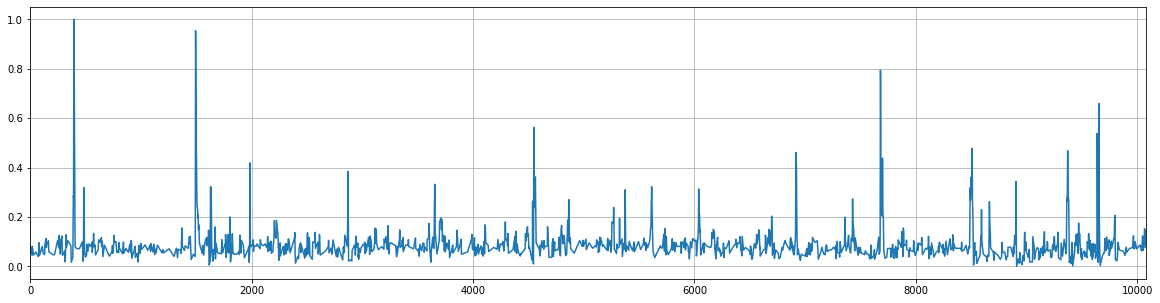

In [19]:
data['y1'].plot(figsize=(20,5))
plt.grid()

In [9]:
h2s = data.copy()

In [10]:
h2s.drop(['y2'], axis=1, inplace=True)

In [11]:
h2s.head()

,a1,a2,a3,a4,a5,y1
0,0.663113,0.774276,0.470970,0.096044,0.019865,0.083362
1,0.659960,0.766021,0.473398,0.111023,0.027957,0.081265
2,0.654670,0.767519,0.474198,0.105410,0.028907,0.079168
3,0.653325,0.769922,0.475963,0.066221,0.029411,0.077070
4,0.654726,0.760449,0.478833,0.033746,0.031592,0.074973


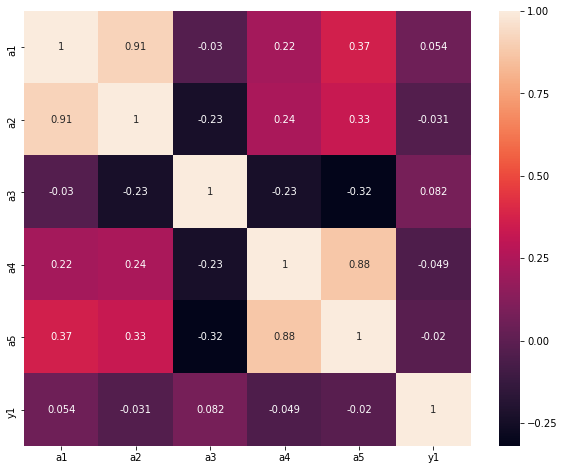

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(h2s.corr(), annot=True)


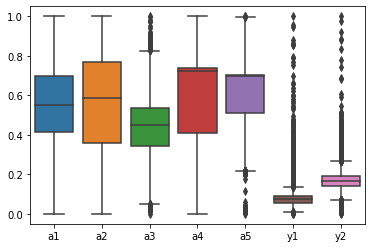

In [18]:
sns.boxplot(data=data)

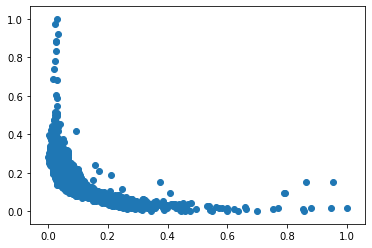

In [28]:
plt.scatter(data['y1'],data['y2'])